<a href="https://colab.research.google.com/github/RyanZha0/CIENE-4012/blob/main/Mobility%20heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

In [ ]:
gdf_2 = gpd.read_file("manhattan_areas.geojson")

<Axes: >

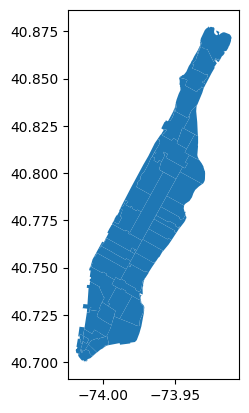

In [ ]:
gdf_2.plot()

In [ ]:
import pandas as pd
#zip_df = pd.read_csv("/content/drive/My Drive/CIEN 4012 Project/Codes/Checking empty values/During covid/added_zipcodes_aver.csv")
zip_df = pd.read_csv("Copy of Ratio.csv")
zip_df

,zipcode,ratio,ratios
0,10001,0.177778,17.777778
1,10002,0.009804,0.980392
2,10003,0.062774,6.277372
3,10026,0.043058,4.305772
4,10007,0.052174,5.217391
5,10009,0.018605,1.860465
6,10010,0.200000,20.000000
7,10011,0.074419,7.441860
8,10013,0.020339,2.033898
9,10014,0.022857,2.285714


In [ ]:
gdf_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        106 non-null    int64   
 1   postalCode      106 non-null    object  
 2   PO_NAME         106 non-null    object  
 3   STATE           106 non-null    object  
 4   borough         106 non-null    object  
 5   ST_FIPS         106 non-null    object  
 6   CTY_FIPS        106 non-null    object  
 7   BLDGpostalCode  106 non-null    int64   
 8   Shape_Leng      106 non-null    float64 
 9   Shape_Area      106 non-null    float64 
 10  @id             106 non-null    object  
 11  geometry        106 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(7)
memory usage: 10.1+ KB


In [ ]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  33 non-null     int64  
 1   ratio    33 non-null     float64
 2   ratios   33 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 920.0 bytes


In [ ]:
# convert int to string
zip_df["zipcode"] = zip_df["zipcode"].astype(str)

In [ ]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  33 non-null     object 
 1   ratio    33 non-null     float64
 2   ratios   33 non-null     float64
dtypes: float64(2), object(1)
memory usage: 920.0+ bytes


In [ ]:
zip_df

,zipcode,ratio,ratios
0,10001,0.177778,17.777778
1,10002,0.009804,0.980392
2,10003,0.062774,6.277372
3,10026,0.043058,4.305772
4,10007,0.052174,5.217391
5,10009,0.018605,1.860465
6,10010,0.200000,20.000000
7,10011,0.074419,7.441860
8,10013,0.020339,2.033898
9,10014,0.022857,2.285714


In [ ]:
df_merge = gdf_2.merge( zip_df , left_on="postalCode", right_on="zipcode", how="right")
df_merge

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,zipcode,ratio,ratios
0,114,10001,New York,NY,Manhattan,36,061,0,19254.442129,1.779494e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00827 40.75259, -74.00763 40.754...",10001,0.177778,17.777778
1,124,10002,New York,NY,Manhattan,36,061,0,36484.417965,2.628013e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97442 40.73642, -73.97450 40.735...",10002,0.009804,0.980392
2,122,10003,New York,NY,Manhattan,36,061,0,17396.136890,1.553838e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97986 40.73497, -73.98864 40.722...",10003,0.062774,6.277372
3,77,10026,New York,NY,Manhattan,36,061,0,15644.925148,1.109268e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.94460 40.80323, -73.94922 40.796...",10026,0.043058,4.305772
4,130,10007,New York,NY,Manhattan,36,061,0,13425.241772,5.328635e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01362 40.71631, -74.01339 40.717...",10007,0.052174,5.217391
5,126,10009,New York,NY,Manhattan,36,061,0,16247.124264,1.590352e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97346 40.73071, -73.97249 40.729...",10009,0.018605,1.860465
6,119,10010,New York,NY,Manhattan,36,061,0,23512.593498,9.768395e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.98775 40.74407, -73.98453 40.742...",10010,0.200000,20.000000
7,115,10011,New York,NY,Manhattan,36,061,0,24714.121442,1.811842e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.99232 40.74357, -73.99416 40.741...",10011,0.074419,7.441860
8,128,10013,New York,NY,Manhattan,36,061,0,19248.015538,1.558058e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00373 40.72625, -74.00457 40.724...",10013,0.020339,2.033898
9,121,10014,New York,NY,Manhattan,36,061,0,20454.072242,1.415105e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00095 40.73171, -74.00214 40.729...",10014,0.022857,2.285714


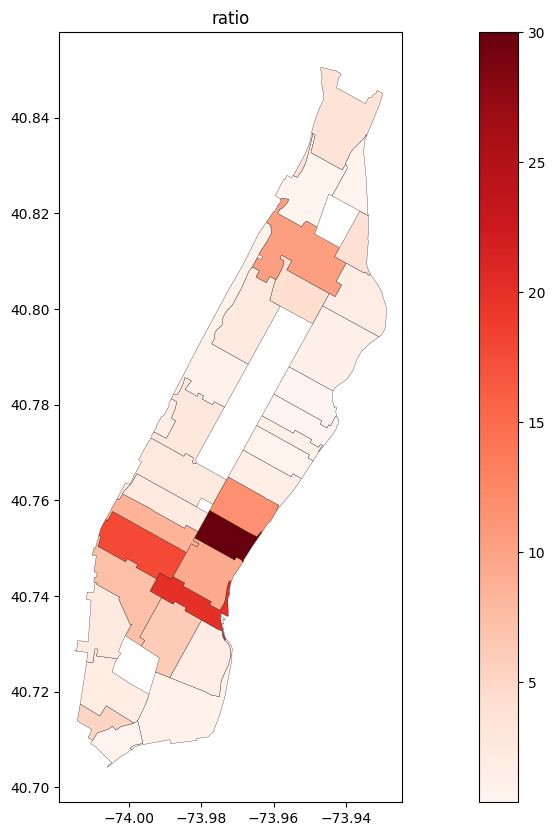

In [ ]:
import matplotlib.pyplot as plt
df_merge.plot(column="ratios", legend=True, figsize = (20,10),
             cmap="Reds", edgecolor = "k",
             linewidth = 0.2)
plt.title('ratio')
plt.show()